In [1]:
import pandas as pd

In [2]:
import insta as IG
insta = IG.Instagram()
insta.login()

In [3]:
insta.following()

In [4]:
insta.followers()

In [5]:
insta.get_photos()

100% [................................................................................] 5464 / 5464downloading photo:  maiarabarreto
100% [................................................................................] 4953 / 4953downloading photo:  daianymv
100% [................................................................................] 6587 / 6587downloading photo:  adrianafinamori
100% [................................................................................] 5859 / 5859downloading photo:  _gabysousa97
100% [................................................................................] 6783 / 6783downloading photo:  drikaoliver15
100% [................................................................................] 6783 / 6783downloading photo:  brithanyhausenbek
100% [................................................................................] 6184 / 6184downloading photo:  dionelima2012
100% [...............................................................

In [6]:
follower = pd.read_pickle('follower.pickle')
follower.shape

(552, 6)

In [7]:
following = pd.read_pickle('following.pickle')
following.shape

(634, 6)

In [8]:
following_not_follower = [x for x in following['username'].values if x  not in follower['username'].values ]
print(len(following_not_follower),following_not_follower)

329 ['pycoders', 'raquelchircop', 'ai_machine_learning', 'chapolinsincero', 'raropizza', 'wired', 'businessweek', 'rosyfranchipasquin', 'cesarssalim', 'vtbellini', 'danovaester', 'gemudinhas', 'cosmojoseroberto', 'wilson_svieira', 'lulubasile', 'joaopiresinsta', 'claudionegon', 'danyel.fonseca', 'leticiadiasverona', 'lunacostaol', 'atatipelomundo', 'marcella_blok', 'julianasfonseca', 'jonathanavis', 'andrebastos187', 'alfredoborgesp', 'drppacheco', 'cristianacamarate', 'mianafelipe', 'ernanisouzacosta', 'marcoaur.oficial', 'jineriebetancurt', 'ysdomingues', 'dra.chrisprado', 'showdajessica', 'matheusbo', '13allan', 'raquelflinker', 'bielo_m', 'beatriz.cabral.felicidade', 'seu_hulk', 'juliopitombo', 'leandrogrisoni', 'allinetblemos', 'mnrcruz85', 'wearedefcon', 'birinasdoguana', 'isphus1973', 'filipedeschamps', 'juliacfranco', 'robertobscosta', 'gavic37', 'psicologa_julianovaes', 'julipima', 'recreiocanoas', 'canoada_vila', 'pauloalvesromao', 'martal.borges', 'raspberrypifoundation', 'm

In [9]:
follower_not_following = [x for x in follower[follower['status'] != 'Solicitado']['username'].values if x  not in following['username'].values ]
print(len(follower_not_following),follower_not_following)

228 ['fotodobrasil_marcelovianna', 'hiphopmusicccf_28', 'mexbeton', 'official_sashadin', 'infoeducausm', 'new.top.tech', 'investorjohndickson', 'kickscooterlive', 'ai_art_supreme', 'alphakit.ir', 'ccbots_eng', 'psicologarosanedemirandamuniz', 'junioradal97', 'fatornerdoficial', 'ix_donatus', 'camila_albiero', 'arduino_diy_all', 'zoyakostyuk', 'instructoresasociados', 'resistthesurge', 'destinos___imperdiveis', 'dev.up', 'braian5614', 'data_science_central', 'olivia.goodwill.fx', 'lascala_integrated_media', 'pratiquearomaterapia', 'fernandalewit', 'bolao_tricolor', 'plasticalchemy', 'maddybrowniie', 'becintech', 'vixenhammish', 'meumantoficial01', 'kromoscentro', 'paulorobertojr.fisioterapeuta', 'techpixid', 'gb.coach', 'olharnerdstore', 'sophieellisonk191', 'taekwondo.academy.slovakia', 'maxpronko', 'iptv_cinehd', 'cad_kw', '3d_option_', 'psicoavila', 'bottrader.world', 'giuseppesantoro1470', 'a19vm', 'kcstore17', 'fotografandopelorio', 'bemestarreeducacao', 'laisway', 'lifesgreatirl',

In [10]:
follower.groupby('status').count()

,time_first,time_last,username,name,img
status,,,,,
Seguindo,300,300,300,300,300
Seguir,233,233,233,233,233
Solicitado,19,19,19,19,19


In [11]:
follower[follower['status'] == 'Solicitado']

,time_first,time_last,username,name,status,img
30,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,judiamantaras,Juliana Diamantaras,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/c2...
81,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,janemeger,Janete Meger Crestana,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/34...
186,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,gabdorn,Gabriel Dornbach,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6d...
191,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,jose_wagner,José Wagner Sanches,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/fa...
220,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,paola.gaggini,Paola Gaggini,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6f...
226,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,christina.penna,Christina Penna,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/20...
260,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,rogertaipina,Roger Taipina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/43...
265,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,marcellaincerti,Marcella Incerti,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/19...
270,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,consultoria.medina,Bernardo Medina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/03...
291,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,debylamszt,Débora Lam,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...


In [12]:
follower.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
551,2019-08-04 22:18:09.465551,2019-08-04 22:18:09.465551,ourdata.community,Seer Data,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/a84...
550,2019-08-04 22:18:09.465551,2019-08-04 22:18:09.465551,dj.power3,Dj_power,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/4da...
549,2019-08-04 22:18:09.465551,2019-08-04 22:18:09.465551,screwitagain,Screw It Again,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/aff...
548,2019-08-04 22:18:09.465551,2019-08-04 22:18:09.465551,rodrig0.almeida,Rodrigo,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/7cc...
547,2019-08-04 22:18:09.465551,2019-08-04 22:18:09.465551,thais.lima.lima,Thais Lima,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/40e...
546,2019-08-04 22:18:09.465551,2019-08-04 22:18:09.465551,rafaeldittmann,Rafael Dittmann,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/e52...
545,2019-08-04 22:18:09.465551,2019-08-04 22:18:09.465551,solange.rodrigues.180,Solange Rodrigues,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/6c1...
544,2019-08-04 22:18:09.465551,2019-08-04 22:18:09.465551,cidha_damasceno,cidha_damasceno,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/bf7...
538,2019-08-04 17:25:00.382049,2019-08-04 22:18:09.465551,quentinhadamamae_,Quentinha Da Mamãe,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/67d...
534,2019-08-04 17:25:00.382049,2019-08-04 22:18:09.465551,boutique.takwa.femme,Boutique Islamique TAKWA 👸🏽,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/8ca...


In [13]:
follower[follower['time_last'] < max(follower['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
13,2019-07-29 22:30:54.216241,2019-07-29 22:30:54.216241,kickscooterlive,🛴 KickScooterLive Official,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/c7...
94,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,gargamelhumorista,Gargamel Humorista,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...
85,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,cuidandodosono,Drª Danuska - Psi e Sono 😴💤,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/48...
450,2019-07-30 08:41:23.735903,2019-07-31 21:25:50.080325,mbaliles,Mr Baliles,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/0e...
454,2019-07-30 15:25:42.180571,2019-07-31 21:25:50.080325,tkdchavez,Osvaldo Chavez,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/b9...
451,2019-07-30 10:13:53.849995,2019-07-31 21:25:50.080325,mortenohle,Morten Ohle,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
181,2019-07-29 22:30:54.216241,2019-07-31 21:25:50.080325,ah_investment,AH investment,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/40...
9,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,new.top.tech,N.T.T,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/07...
67,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,psicoavila,Psi. Richard Avila,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/35...
474,2019-08-01 10:43:26.593775,2019-08-02 10:37:08.772824,adhy_inv,ADHY Investment,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/85d...


In [14]:
following.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
633,2019-08-04 22:31:40.309231,2019-08-04 22:31:40.309231,patgonzalez88,Patricia Gonzalez,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/821...
608,2019-08-04 22:13:41.081369,2019-08-04 22:31:40.309231,renatacartagenes,Renata Cartagenes Ferreira,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/e33...
606,2019-08-04 22:13:41.081369,2019-08-04 22:31:40.309231,rick_f_r_a_s_e_s_,Ricardo Oliveira.❤,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/489...
605,2019-08-04 22:13:41.081369,2019-08-04 22:31:40.309231,psico.loga,Psi,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/1f5...
604,2019-08-04 22:13:41.081369,2019-08-04 22:31:40.309231,trlynek97,🌻,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/2dd...
603,2019-08-04 22:13:41.081369,2019-08-04 22:31:40.309231,larissadias506,LarissaDias,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/04a...
602,2019-08-04 22:13:41.081369,2019-08-04 22:31:40.309231,rafaeldittmann,Rafael Dittmann,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/e52...
601,2019-08-04 22:13:41.081369,2019-08-04 22:31:40.309231,douglasabnovato,douglasabnovato,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/6ea...
600,2019-08-04 22:13:41.081369,2019-08-04 22:31:40.309231,bruna_acampos,Bruna de Campos,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/f2d...
598,2019-08-04 22:13:41.081369,2019-08-04 22:31:40.309231,laisf_castilho,Laís Fernanda Castilho,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/65c...


In [15]:
following[following['time_last'] < max(following['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
3,2019-07-30 10:29:44.220296,2019-07-31 11:04:28.946769,chapolinsincero,Chapolin Sincero,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
578,2019-08-03 16:31:25.281430,2019-08-04 17:50:28.684857,globoesportecom,GloboEsporte.com,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/3d2...
0,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,pycoders,Python Coders,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/25...
386,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,gilson3126,Gilson,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/f3...
387,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,carlosfmmiranda,Carlos Miranda,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/01...
388,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,bragalipe,Felipe Braga,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/8f...
389,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,marcella.blok,Marcella Blok,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/97...
390,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,anelisebastos,Ane,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/57...
391,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,andrea_racci,Andrea,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/49...
392,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,canellas,,Seguindo,https://scontent-ort2-2.cdninstagram.com/vp/b7...


In [16]:

people = follower.append(following, ignore_index=True)
people.drop_duplicates('username',inplace=True)

In [17]:

people.sort_values('username')

,time_first,time_last,username,name,status,img
615,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,13allan,Allan Araújo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/97...
694,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,21lucasbastos,Lucas Bastos,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/b6...
449,2019-07-29 23:50:37.874241,2019-08-04 22:18:09.465551,2t.importados,TT Imports,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/5e1...
65,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,3d_option_,3D печать,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/21...
533,2019-08-04 17:25:00.382049,2019-08-04 22:18:09.465551,3dprintalimsatim,3dhayallerinedokun,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/30e...
197,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,_____best_beast____,Евгений,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/f5...
48,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,_gabicabral,,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/d5...
1165,2019-08-04 22:13:41.081369,2019-08-04 22:31:40.309231,_gabysousa97,Gaby Sousa,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/ba2...
323,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,_gustavoayala_,Gustavo Ayala,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/91...
68,2019-07-29 22:30:54.216241,2019-08-04 22:18:09.465551,_luizpinheiro,Luiz Felipe Pinheiro,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/2c...


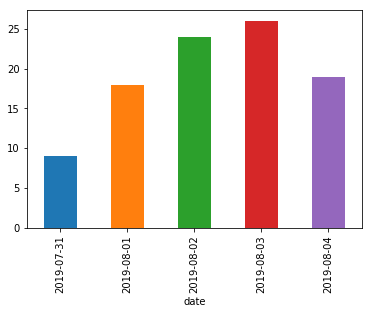

In [20]:
follower['date'] = follower['time_first'].dt.date
follower.groupby('date')['username'].count()[2:].plot(kind='bar')

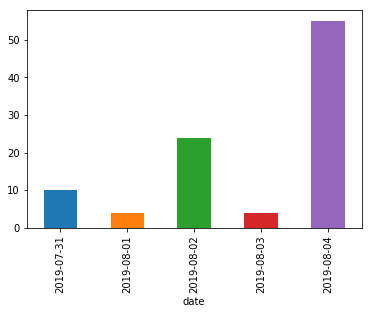

In [21]:
following['date'] = following['time_first'].dt.date
following.groupby('date')['username'].count()[1:].plot(kind='bar')